In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Importing Dataset
df = pd.read_csv("/content/spam.csv", encoding="latin-1")
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will ÃŒ_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [3]:
# Dataset with required features only
df = pd.read_csv("/content/spam.csv", encoding="latin-1", usecols=["v1","v2"])

In [4]:
df.sample(5)

v1                                                 v2
3716  ham                       I'm gonna rip out my uterus.
734   ham  Leaving to qatar tonite in search of an opport...
3333  ham  That's fine, have him give me a call if he kno...
3655  ham  Oh really?? Did you make it on air? What's you...
3692  ham  I was about to do it when i texted. I finished...

In [5]:
# Rename the Features
df.rename(columns={"v1": "output","v2": "input"}, inplace = True)


In [6]:
df.sample(3)

output                                              input
5425    ham           Otherwise had part time job na-tuition..
5552    ham  Have a safe trip to Nigeria. Wish you happines...
4030    ham  Sorry vikky, i'm Watching olave mandara movie ...

In [7]:
# Encoding Target Feature
le = LabelEncoder()
df["output"] = le.fit_transform(df["output"])

In [8]:
df.sample(1)

output                                              input
327       0  I'd say that's a good sign but, well, you know...

In [9]:
# Shape of the Dataset
df.shape

(5572, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   int64 
 1   input   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [11]:
# Check Null Values
df.isnull().sum()

output    0
input     0
dtype: int64

In [12]:
# Check Duplicate Values
df.duplicated().sum()

403

In [13]:
# Drop Duplicates
df = df.drop_duplicates(keep="first")

In [14]:
df.shape

(5169, 2)

In [15]:
df.head()

output                                              input
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [16]:
# Ham & Spam Counts
df["output"].value_counts()

0    4516
1     653
Name: output, dtype: int64

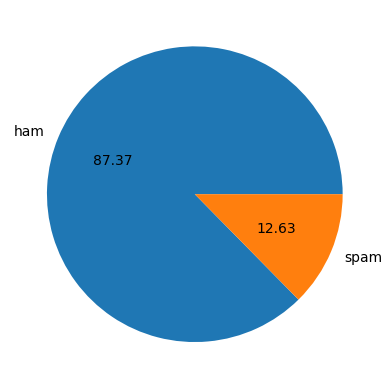

In [17]:
plt.pie(df["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

In [18]:
# Total No. of Characters in Data
df["characters"] = df["input"].apply(len)

In [19]:
# Total No. of Words in Data
df["word"] = df["input"].apply(lambda x:len( nltk.word_tokenize(x)))

In [20]:
# Total No. of Sentence
df["sentence"] = df["input"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

output                                              input  characters  \
0       0  Go until jurong point, crazy.. Available only ...         111   
1       0                      Ok lar... Joking wif u oni...          29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...         155   
3       0  U dun say so early hor... U c already then say...          49   
4       0  Nah I don't think he goes to usf, he lives aro...          61   

   word  sentence  
0    24         2  
1     8         2  
2    37         2  
3    13         1  
4    15         1

In [22]:
# Statistical Analysis of new features
df[["characters","word", "sentence"]].describe()

characters         word     sentence
count  5169.000000  5169.000000  5169.000000
mean     78.977945    18.455794     1.965564
std      58.236293    13.324758     1.448541
min       2.000000     1.000000     1.000000
25%      36.000000     9.000000     1.000000
50%      60.000000    15.000000     1.000000
75%     117.000000    26.000000     2.000000
max     910.000000   220.000000    38.000000

In [23]:
# Statistical Analysis for HAM Data
df[df["output"]==0][["characters","word", "sentence"]].describe()

characters         word     sentence
count  4516.000000  4516.000000  4516.000000
mean     70.459256    17.123782     1.820195
std      56.358207    13.493970     1.383657
min       2.000000     1.000000     1.000000
25%      34.000000     8.000000     1.000000
50%      52.000000    13.000000     1.000000
75%      90.000000    22.000000     2.000000
max     910.000000   220.000000    38.000000

In [24]:
# Statistical Analysis for SPAM Data
df[df["output"] ==1][["characters","word", "sentence"]].describe()

characters        word    sentence
count  653.000000  653.000000  653.000000
mean   137.891271   27.667688    2.970904
std     30.137753    7.008418    1.488425
min     13.000000    2.000000    1.000000
25%    132.000000   25.000000    2.000000
50%    149.000000   29.000000    3.000000
75%    157.000000   32.000000    4.000000
max    224.000000   46.000000    9.000000

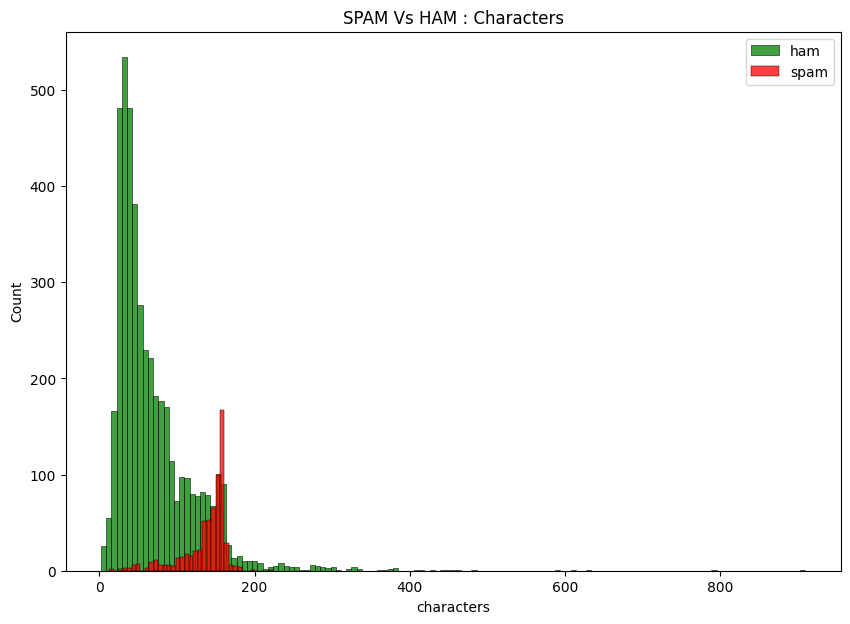

In [25]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

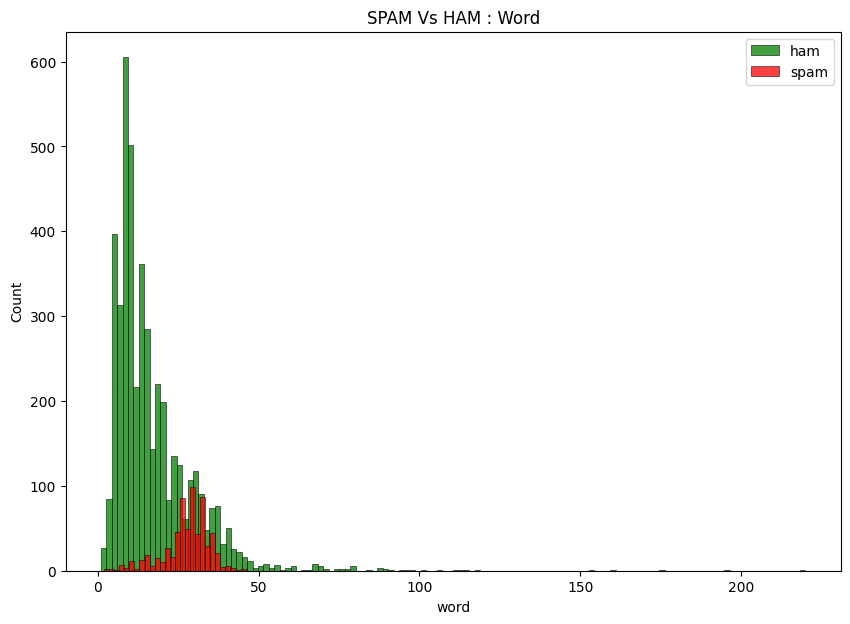

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

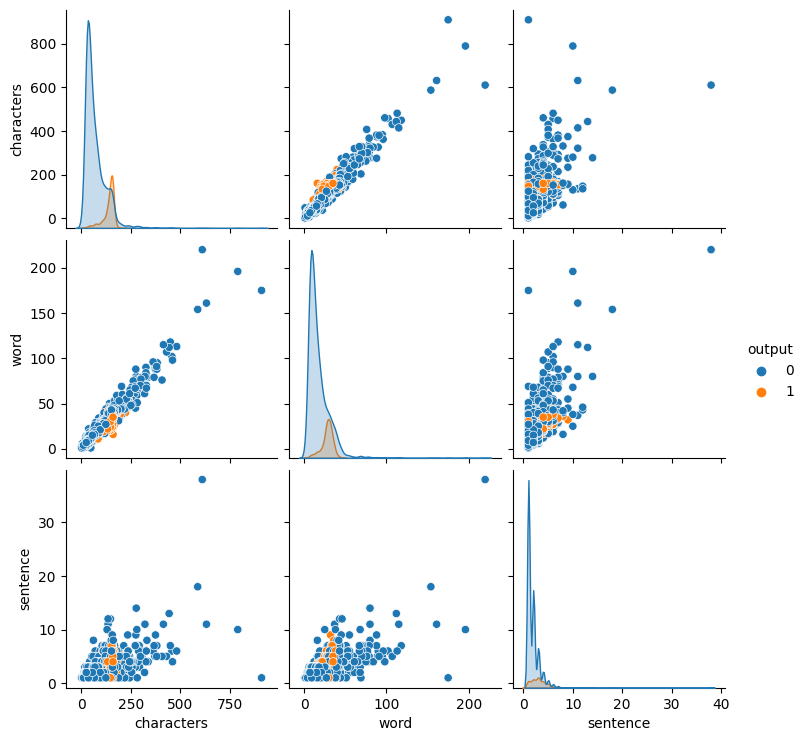

In [27]:
sns.pairplot(df,hue="output")

In [28]:
# Correlations between features
df.corr()

output  characters      word  sentence
output      1.000000    0.384717  0.262912  0.263939
characters  0.384717    1.000000  0.965760  0.624139
word        0.262912    0.965760  1.000000  0.679971
sentence    0.263939    0.624139  0.679971  1.000000

<Axes: >

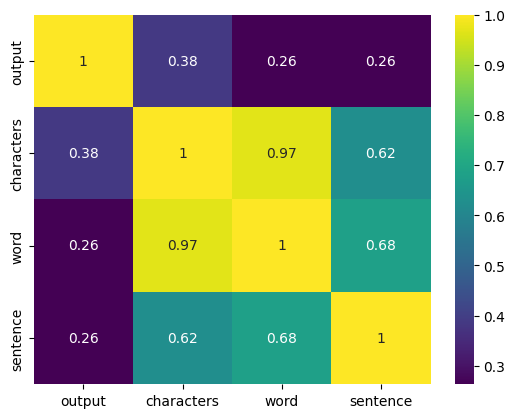

In [29]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")


In [30]:
# Intilizing Porter Stemmer Class
ps = PorterStemmer()

In [31]:
# This Function helps to get Ready!!!

def data(text):
    text = text.lower()               #  Converts Text in Lower Case
    text = nltk.word_tokenize(text)   #  Breaks Text in Words

    y = []
    for i in text:
        if i.isalnum():               #  Removing Special Characters
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:                    #  Removing Stopwords and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:                    #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))

    return " ".join(y)

In [32]:
# Checking data function
data("shree ram ðŸš© and shree mahakaleshawar ðŸ”± are everything for me")


'shree ram shree mahakaleshawar everyth'

In [33]:
df.sample(2)

output                                              input  characters  \
3814       0  Not yet chikku..k, then wat abt tht guy did he...          82   
2022       1  U can WIN Ã¥Â£100 of Music Gift Vouchers every w...         158   

      word  sentence  
3814    20         1  
2022    23         1

In [34]:
# Transforming dataset using the "data" function in new column "new_data"
df["new_data"] = df["input"].apply(data)


In [35]:
df.sample(5)

output                                              input  characters  \
302        0  Oh and by the way you do have more food in you...          91   
738        0                          Wish i were with you now!          25   
2747       0                       Ya had just now.onion roast.          28   
2702       0  Omw back to tampa from west palm, you hear wha...          57   
2695       0  And whenever you and i see we can still hook u...          52   

      word  sentence                                new_data  
302     23         2  oh way food fridg want go meal tonight  
738      7         1                                    wish  
2747     6         1                                ya roast  
2702    13         1    omw back tampa west palm hear happen  
2695    13         1                   whenev see still hook

In [36]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

In [37]:
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["output"] ==1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["output"] ==0]["new_data"].str.cat(sep=" "))


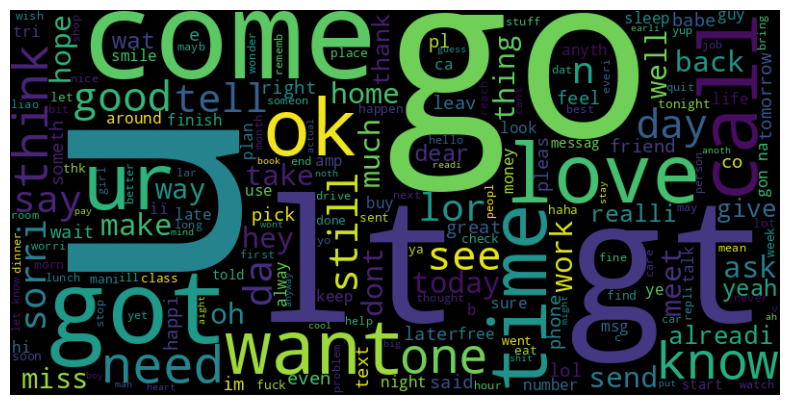

In [38]:
# SPAM
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

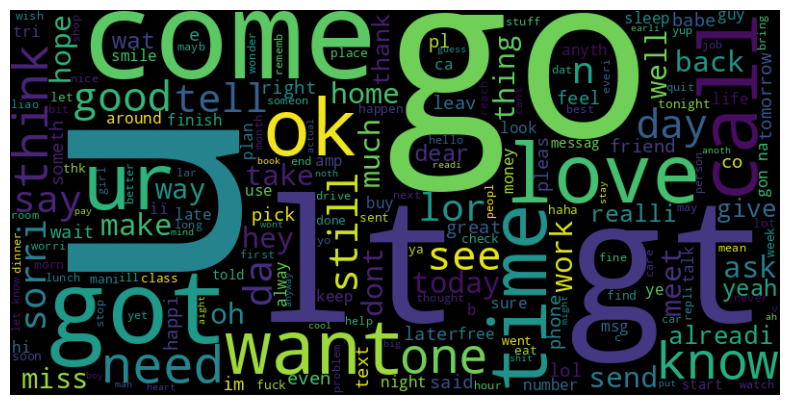

In [39]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in df[df["output"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)


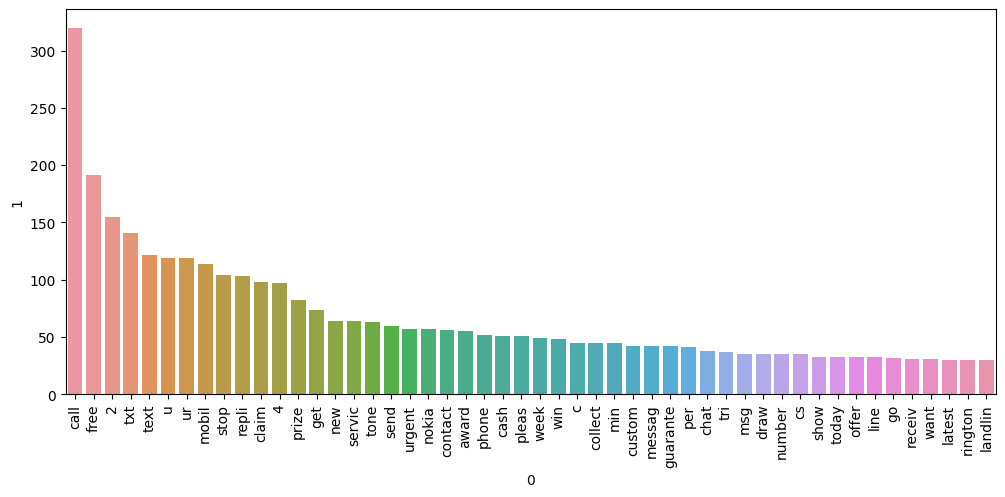

In [41]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

In [42]:
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in df[df['output'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

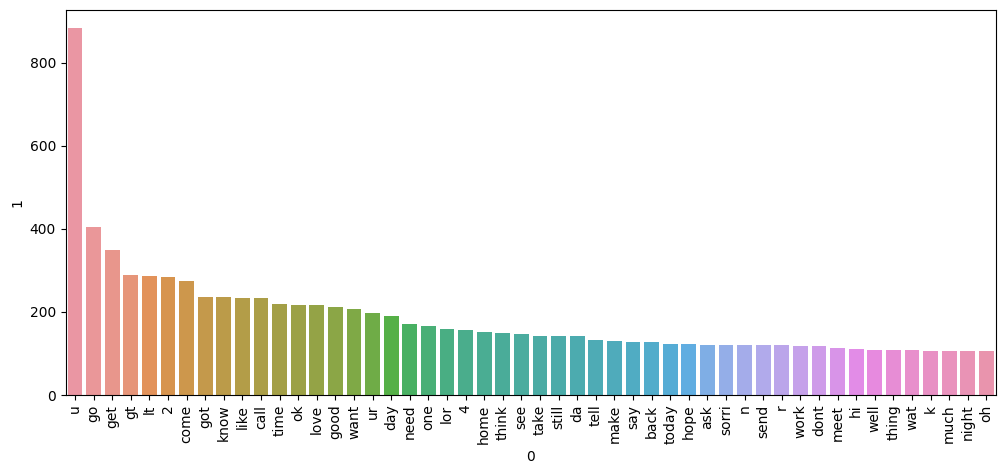

In [43]:
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()


In [44]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)

In [45]:
# Independent Feature
X = tfidv.fit_transform(df["new_data"]).toarray()

In [46]:
# Dependent Feature
y = df["output"].values


In [47]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [48]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
}

In [49]:
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)

    return acc, pre

In [50]:
# A FOR loop Calls "traim_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)

    acc_s.append(accuracy)
    pre_s.append(precision)

In [51]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(),
                          "Accuracy": acc_s,
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)


In [52]:
scores_df

Algorithm  Accuracy  Precision
6                   KNN  0.916828   1.000000
4                   SVC  0.974855   0.991736
8         Random Forest  0.973888   0.991667
1        Multinomial NB  0.972921   0.991597
9                   ETC  0.978723   0.976744
11       Gradient Boost  0.959381   0.963964
2          Bernoulli NB  0.972921   0.960630
3   Logistic Regression  0.958414   0.947368
12                  XGB  0.970986   0.938931
13                XGBRF  0.944874   0.879310
7           Bagging CLF  0.961315   0.872340
10            Ada Boost  0.950677   0.867188
5         Decision Tree  0.955513   0.841379
0           Gaussian NB  0.860735   0.502075

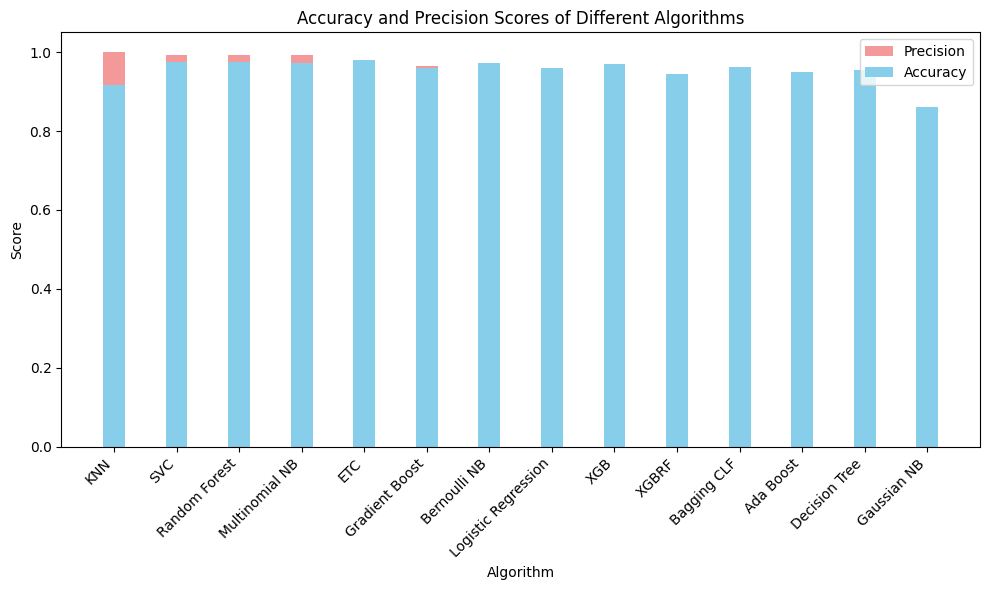

In [53]:
# Graph Accuracy and Precision

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
# Hence Multinomial NaÃ¯ve Bayes give excellent precision and accuracy scores.
# According to me MNB is sutaible for Model

mnb=MultinomialNB()
mnb.fit(X_train, y_train)


MultinomialNB()